### Project - MovieLens Data Analysis

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, I will be using this data to act as a means to demonstrate my skill in using Python to “play” with data.

#### Domain 
Internet and Entertainment

#### 1. Import the necessary packages

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")
import warnings
warnings.filterwarnings('ignore')

#### 2. Read the 3 datasets into dataframes 

In [36]:
Data_dataset = pd.read_csv('Data.csv')
item_dataset = pd.read_csv('item.csv')
user_dataset = pd.read_csv('user.csv')

#### 3. Apply info, shape, describe, and find the number of missing values in the data 

In [37]:
print(Data_dataset.info())
print()
print(Data_dataset.shape)
print()
print(Data_dataset.describe())
print()
print(Data_dataset.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user id    100000 non-null  int64
 1   movie id   100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB
None

(100000, 4)

            user id       movie id         rating     timestamp
count  100000.00000  100000.000000  100000.000000  1.000000e+05
mean      462.48475     425.530130       3.529860  8.835289e+08
std       266.61442     330.798356       1.125674  5.343856e+06
min         1.00000       1.000000       1.000000  8.747247e+08
25%       254.00000     175.000000       3.000000  8.794487e+08
50%       447.00000     322.000000       4.000000  8.828269e+08
75%       682.00000     631.000000       4.000000  8.882600e+08
max       943.00000    1682.000000       5.000000  8.932866e+08

user id      0
movie id

In [38]:
print(item_dataset.info())
print()
print(item_dataset.shape)
print()
print(item_dataset.describe())
print()
print(item_dataset.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1681 entries, 0 to 1680
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movie id      1681 non-null   int64 
 1   movie title   1681 non-null   object
 2   release date  1681 non-null   object
 3   unknown       1681 non-null   int64 
 4   Action        1681 non-null   int64 
 5   Adventure     1681 non-null   int64 
 6   Animation     1681 non-null   int64 
 7   Childrens     1681 non-null   int64 
 8   Comedy        1681 non-null   int64 
 9   Crime         1681 non-null   int64 
 10  Documentary   1681 non-null   int64 
 11  Drama         1681 non-null   int64 
 12  Fantasy       1681 non-null   int64 
 13  Film-Noir     1681 non-null   int64 
 14  Horror        1681 non-null   int64 
 15  Musical       1681 non-null   int64 
 16  Mystery       1681 non-null   int64 
 17  Romance       1681 non-null   int64 
 18  Sci-Fi        1681 non-null   int64 
 19  Thrill

In [39]:
print(user_dataset.info())
print()
print(user_dataset.shape)
print()
print(user_dataset.describe())
print()
print(user_dataset.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB
None

(943, 5)

          user id         age
count  943.000000  943.000000
mean   472.000000   34.051962
std    272.364951   12.192740
min      1.000000    7.000000
25%    236.500000   25.000000
50%    472.000000   31.000000
75%    707.500000   43.000000
max    943.000000   73.000000

user id       0
age           0
gender        0
occupation    0
zip code      0
dtype: int64


#### 4. Find the number of movies per genre using the item data

In [40]:
item_dataset[['unknown','Action','Adventure','Animation','Childrens','Comedy','Crime','Documentary','Drama','Fantasy','Film-Noir','Horror',
             'Musical','Mystery','Romance','Sci-Fi','Thriller','War','Western']].sum() 

unknown          1
Action         251
Adventure      135
Animation       42
Childrens      122
Comedy         505
Crime          109
Documentary     50
Drama          725
Fantasy         22
Film-Noir       24
Horror          92
Musical         56
Mystery         61
Romance        247
Sci-Fi         101
Thriller       251
War             71
Western         27
dtype: int64

In [41]:
item_dataset.loc[:,'Action':'Western'].sum()

Action         251
Adventure      135
Animation       42
Childrens      122
Comedy         505
Crime          109
Documentary     50
Drama          725
Fantasy         22
Film-Noir       24
Horror          92
Musical         56
Mystery         61
Romance        247
Sci-Fi         101
Thriller       251
War             71
Western         27
dtype: int64

#### 5. Find the movies that have more than one genre

In [42]:
#  To Find the movies that have more than one genre

item_dataset.columns

Index(['movie id', 'movie title', 'release date', 'unknown', 'Action',
       'Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'],
      dtype='object')

In [43]:
new_item_dataset = item_dataset[['movie id', 'movie title']]

In [44]:
new_item_dataset["Number of Genres"]=item_dataset[['movie title', 'unknown', 'Action',
       'Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']].sum(axis=1)

In [45]:
new_item_dataset[new_item_dataset['Number of Genres']>1]

,movie id,movie title,Number of Genres
0,1,Toy Story,3
1,2,GoldenEye,3
3,4,Get Shorty,3
4,5,Copycat,3
6,7,Twelve Monkeys,2
...,...,...,...
1667,1669,MURDER and murder,3
1668,1670,Tainted,2
1671,1673,Mirage,2
1677,1679,B. Monkey,2


#### 6. Drop the movie where the genre is unknown 

In [46]:
item_dataset = item_dataset[item_dataset['unknown']!=1]

In [47]:
item_dataset

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1676,1678,Mat' i syn,06-Feb-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1677,1679,B. Monkey,06-Feb-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1678,1680,Sliding Doors,01-Jan-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1679,1681,You So Crazy,01-Jan-1994,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


### 7. Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation'

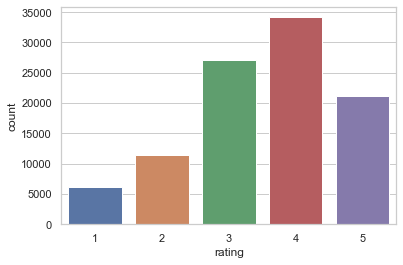

In [48]:

sns.countplot(Data_dataset['rating'])
plt.show()

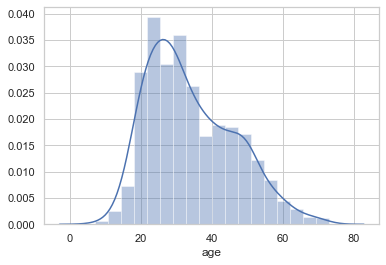

In [49]:
# Age

sns.distplot(user_dataset['age'])
plt.show()

In [50]:
# Release Year

item_dataset['release year'] = item_dataset['release date'].str[-4:].astype(int)
item_dataset['release year']

0       1995
1       1995
2       1995
3       1995
4       1995
        ... 
1676    1998
1677    1998
1678    1998
1679    1994
1680    1996
Name: release year, Length: 1680, dtype: int32

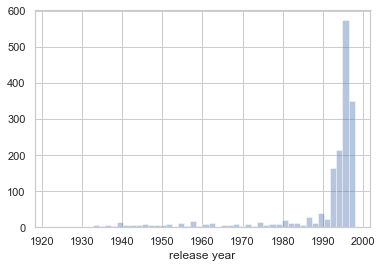

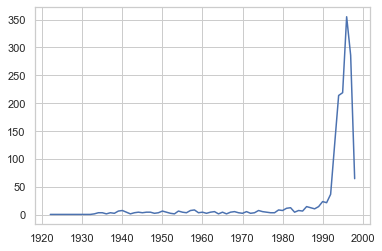

In [51]:
sns.distplot(item_dataset['release year'],kde=False)
plt.show()
print()
plt.plot(item_dataset.groupby("release year")["release year"].count())
plt.show()

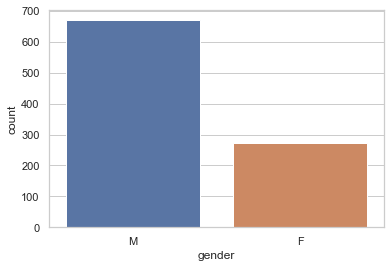

In [52]:
# Gender

sns.countplot(user_dataset['gender'])
plt.show()

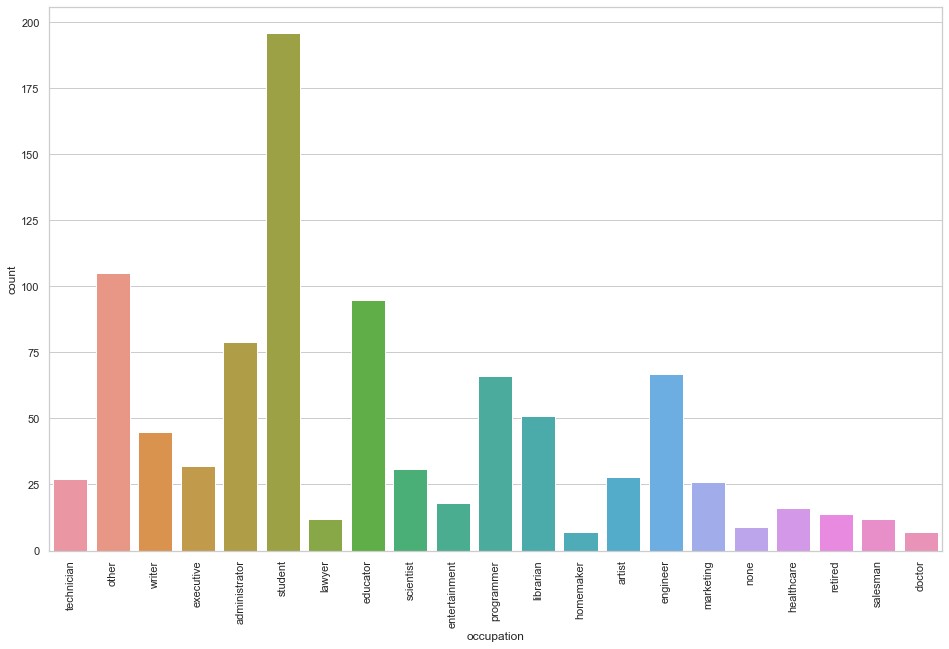

In [53]:
# Occupation

plt.figure(figsize=(16,10))
plt.xticks(rotation=90)
sns.countplot(user_dataset['occupation'])
plt.show()

### 8. Visualize how popularity of genres has changed over the years 

Note that you need to use the number of releases in a year as a parameter of popularity of a genre

In [54]:
genre_by_year = item_dataset.drop(columns = 'movie id')

In [55]:
genre_by_year = genre_by_year.groupby('release year').sum()
genre_by_year1 = genre_by_year.T

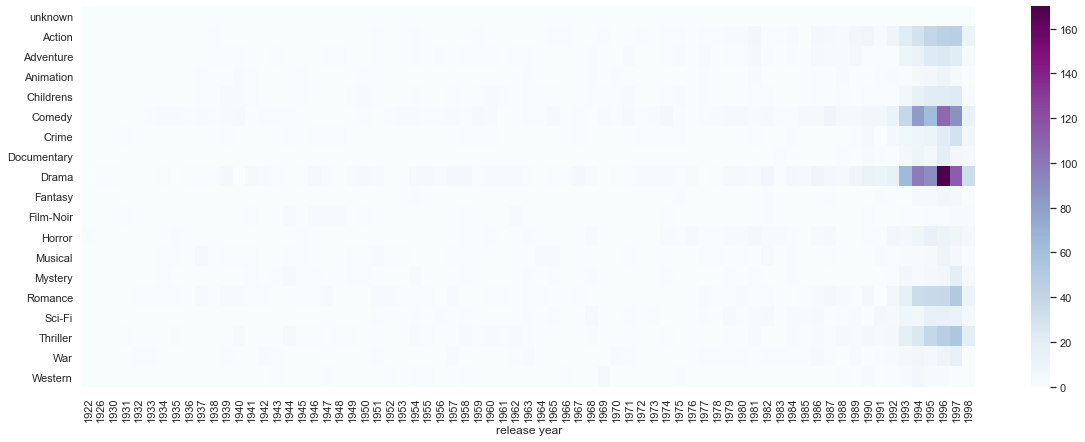

In [56]:
plt.figure(figsize=(20,7))  #setting the figure size
sns.heatmap(genre_by_year1, cmap='BuPu')  #heat map to plot the above table
plt.show()

### 9. Find the top 25 movies according to average ratings such that each movie has number of ratings more than 100 

In [57]:
ud_dataset  = user_dataset.merge(Data_dataset,on='user id',how='inner')
df = item_dataset.merge(ud_dataset,on='movie id',how='inner')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99990 entries, 0 to 99989
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movie id      99990 non-null  int64 
 1   movie title   99990 non-null  object
 2   release date  99990 non-null  object
 3   unknown       99990 non-null  int64 
 4   Action        99990 non-null  int64 
 5   Adventure     99990 non-null  int64 
 6   Animation     99990 non-null  int64 
 7   Childrens     99990 non-null  int64 
 8   Comedy        99990 non-null  int64 
 9   Crime         99990 non-null  int64 
 10  Documentary   99990 non-null  int64 
 11  Drama         99990 non-null  int64 
 12  Fantasy       99990 non-null  int64 
 13  Film-Noir     99990 non-null  int64 
 14  Horror        99990 non-null  int64 
 15  Musical       99990 non-null  int64 
 16  Mystery       99990 non-null  int64 
 17  Romance       99990 non-null  int64 
 18  Sci-Fi        99990 non-null  int64 
 19  Thri

In [58]:
top_movies = df.groupby(['movie id','movie title']).rating.count().reset_index()
movie_t = list(top_movies[top_movies['rating']>100]['movie id'])

In [59]:
avg_rating = df.groupby(['movie id','movie title'])['rating'].mean().sort_values(ascending=False).reset_index()

In [60]:
avg_rating[avg_rating['movie id'].isin(movie_t)].head(25)

,movie id,movie title,rating
15,408,"Close Shave, A",4.491071
16,318,Schindler's List,4.466443
17,169,"Wrong Trousers, The",4.466102
18,483,Casablanca,4.456790
20,64,"Shawshank Redemption, The",4.445230
21,603,Rear Window,4.387560
22,12,"Usual Suspects, The",4.385768
23,50,Star Wars,4.358491
24,178,12 Angry Men,4.344000
28,134,Citizen Kane,4.292929


### 10. See gender distribution across different genres check for the validity of the below statements

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women


#### Conclusion:



In [61]:
Genre_by_Gender = df.groupby('gender').sum().loc[:,'Action':'Western'] 
Genre_by_Gender

,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
gender,,,,,,,,,,,,,,,,,,
F,5442,3141,995,2232,8068,1794,187,11008,363,385,1197,1442,1314,5858,2629,5086,2189,371
M,20147,10612,2610,4950,21764,6261,571,28887,989,1348,4120,3512,3931,13603,10101,16786,7209,1483


In [62]:
Genre_by_Gender['total'] = Genre_by_Gender.sum(axis = 1)

In [63]:
Genre_by_Gender

,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,total
gender,,,,,,,,,,,,,,,,,,,
F,5442,3141,995,2232,8068,1794,187,11008,363,385,1197,1442,1314,5858,2629,5086,2189,371,53701
M,20147,10612,2610,4950,21764,6261,571,28887,989,1348,4120,3512,3931,13603,10101,16786,7209,1483,158884


In [64]:
Genre_by_Gender.div(Genre_by_Gender.total, axis= 0) * 100 

,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,total
gender,,,,,,,,,,,,,,,,,,,
F,10.133889,5.849053,1.852852,4.156347,15.023929,3.340720,0.348224,20.498687,0.675965,0.716933,2.229009,2.685239,2.446882,10.908549,4.895626,9.47096,4.076274,0.690862,100.0
M,12.680320,6.679087,1.642708,3.115480,13.698044,3.940611,0.359382,18.181189,0.622467,0.848418,2.593087,2.210418,2.474132,8.561592,6.357468,10.56494,4.537272,0.933385,100.0


In [65]:
###Conclusion:

###Answer: All the statements were false.
         # Women(20%) watch more Drama than men(18%)
         #According to Data Men (6%) watch more Sci-Fi than Women(4%)
          #According to Data Women(10%) watch more Romance than Men(8%)
            
            #So all given Statements were False